In [2]:
#importing libraries
import numpy as np
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df.head()

/opt/anaconda3/envs/p_da_project/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [ ]:
df_skills=df.copy()


In [4]:
df_skill_count=df_skills.explode('job_skills').groupby(['job_skills','job_title_short']).size().reset_index(name='count').sort_values(by='count',ascending=False)

In [17]:
df_skill_count
df_skills_total=df_skills["job_title_short"].value_counts().reset_index(name='job_count')
df_skills_percentage=pd.merge(df_skill_count,df_skills_total,how='left',on='job_title_short')
df_skills_percentage['percentage']=100*df_skills_percentage['count']/df_skills_percentage['job_count']
df_skills_percentage

,job_skills,job_title_short,count,job_count,percentage
0,python,Data Scientist,113711,172286,66.001300
1,sql,Data Engineer,113130,186241,60.743875
2,python,Data Engineer,108022,186241,58.001192
3,sql,Data Analyst,92428,196075,47.139105
4,sql,Data Scientist,78982,172286,45.843539
...,...,...,...,...,...
2251,webex,Senior Data Scientist,1,36957,0.002706
2252,mattermost,Data Scientist,1,172286,0.000580
2253,clickup,Machine Learning Engineer,1,14080,0.007102
2254,heroku,Senior Data Analyst,1,29216,0.003423


In [6]:
job_titles=pd.Series(['Data Analyst','Data Engineer','Data Scientist'])

In [7]:
job_titles

0      Data Analyst
1     Data Engineer
2    Data Scientist
dtype: object

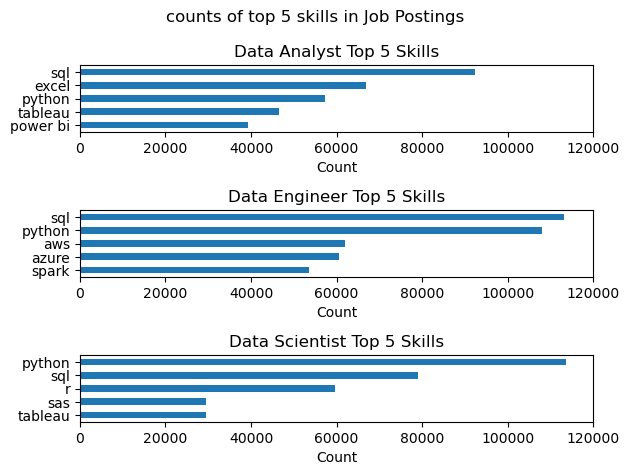

In [16]:
fig,ax=plt.subplots(3,1)
for i,job_title in enumerate(job_titles):
    df_skills_percentage[df_skills_percentage['job_title_short']==job_title].head(5).plot(kind='barh',x='job_skills',y='count',ax=ax[i],title=f'{job_title} Top 5 Skills')
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('Count')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,120000)
plt.suptitle('counts of top 5 skills in Job Postings')
plt.tight_layout()
plt.show()

In [22]:
import seaborn as sns

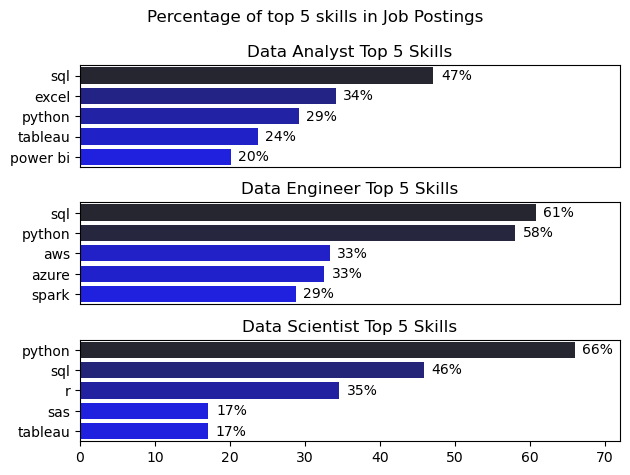

In [36]:
fig,ax=plt.subplots(3,1)
for i,job_title in enumerate(job_titles):
    df_plot= df_skills_percentage[df_skills_percentage['job_title_short']==job_title].head(5)
    sns.barplot(y='job_skills',x='percentage',ax=ax[i],hue="percentage",data=df_plot,palette='dark:b_r')
    ax[i].set_title(f'{job_title} Top 5 Skills')
   
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,72)
    for n,v in enumerate(df_plot['percentage']):
        ax[i].text(v+1,n,f'{v:.0f}%',va='center')
    if i!=len(job_titles)-1:
        ax[i].set_xticks([])    
plt.suptitle('Percentage of top 5 skills in Job Postings')
plt.tight_layout()
plt.show()